# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [1]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [3]:
# To see all columns information
pd.set_option('display.max_columns', None)  

In [4]:
# Let's start with exploring shape and basic info about data such as ich type
print(df.shape)

# We have only 79 observations, so we cannot really afford droping rows as the amount of data is already quite low
df.info()

(79, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WaterworksName             79 non-null     object 
 1   TotalFilters               79 non-null     int64  
 2   MaxTypicalFlow             63 non-null     float64
 3   AverageFilterArea          75 non-null     float64
 4   AverageTypicalRunVolume    77 non-null     float64
 5   AverageBackwashVolume      69 non-null     float64
 6   PrimaryTrigger             79 non-null     object 
 7   AverageTotalFilterDepth    46 non-null     float64
 8   OverallFilterGrainSizeMin  45 non-null     float64
 9   OverallFilterGrainSizeMax  45 non-null     float64
 10  AverageFilterBedVolume     45 non-null     float64
 11  FilterExploitation         63 non-null     float64
 12  AerationType               79 non-null     object 
 13  OxygenFactor               79 non-null     

First of all, let's drop irrelevant column containing the name

In [5]:
df = df.drop('WaterworksName',axis=1)

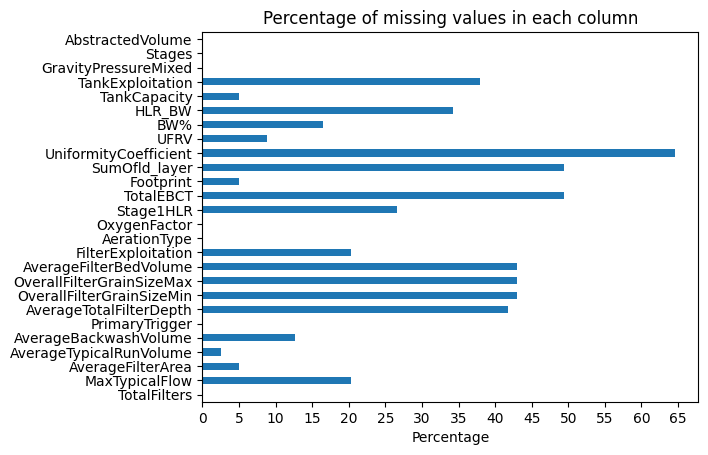

In [6]:
# Let's calculate percentage of nan values in each column and lets plot it
nan_percentage = df.isna().mean().round(4) * 100


nan_percentage.plot(kind='barh')
plt.title('Percentage of missing values in each column')
plt.xlabel('Percentage')
plt.xticks(range(0,70,5))
plt.show()



We will drop colums that have more than 30% of missing data, if the dataset would be bigger we could try to impute the missing data, but with only 80 rows, imputing seems unreliable.

In [7]:
drop_cols = [col for col in df.columns if df[col].isna().mean() > 0.3]
print(drop_cols)
df = df.drop(drop_cols, axis=1)


['AverageTotalFilterDepth', 'OverallFilterGrainSizeMin', 'OverallFilterGrainSizeMax', 'AverageFilterBedVolume', 'TotalEBCT', 'SumOfld_layer', 'UniformityCoefficient', 'HLR_BW', 'TankExploitation']


In [8]:
# Creating lists containing columns that are numerical cols and the ones that are categorical ones
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

print(num_cols, cat_cols)

['TotalFilters', 'MaxTypicalFlow', 'AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'FilterExploitation', 'OxygenFactor', 'Stage1HLR', 'Footprint', 'UFRV', 'BW%', 'TankCapacity', 'AbstractedVolume'] ['PrimaryTrigger', 'AerationType', 'GravityPressureMixed', 'Stages']


In [9]:
cols_w_nans =  [col for col in df.columns if df[col].isna().any()]

num_cols_w_nans = [col for col in num_cols if col in cols_w_nans]

cat_cols_w_nans = [col for col in cat_cols if col in cols_w_nans]

print(num_cols_w_nans, cat_cols_w_nans)

['MaxTypicalFlow', 'AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'FilterExploitation', 'Stage1HLR', 'Footprint', 'UFRV', 'BW%', 'TankCapacity'] []


 ### We are going to use iterative imputer from sklearn that is still experimental.
 It tries iteratively in round robin fashion to create a model to predict missing values in one feature based on other features.
 The entire process is repeated some number of rounds.
 That way of imputing is nice, because it takes into account the relationships between features and it is not just filling missing values with mean, median or mode and for initialial imputing missing values when trying to predict certain feature we use median imputation so that it better works in case a feature distribution is skewed.

 However, we are going to use this only for columns that have less than 20% (we need data to build regression model on). For the rest of the columns we are going to use median imputation (also median in case distribution is skewed).



In [10]:
cols_to_iter_imp = [col for col in num_cols_w_nans if df[col].isna().mean() < 0.20]
cols_to_simple_imp = [col for col in num_cols_w_nans if col not in cols_to_iter_imp]

print(f"Cols to iteratively impute: {cols_to_iter_imp}")
print(f"Cols to simply impute: {cols_to_simple_imp}")

df_to_impute = df[cols_to_iter_imp]

imputer = IterativeImputer(random_state=42, initial_strategy='median')

df_imputed = imputer.fit_transform(df_to_impute)

df[cols_to_iter_imp] = df_imputed

df_to_impute = df[cols_to_simple_imp]

imputer = SimpleImputer(strategy='median')

df_imputed = imputer.fit_transform(df_to_impute)

df[cols_to_simple_imp] = df_imputed


df.isna().mean()

Cols to iteratively impute: ['AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'Footprint', 'UFRV', 'BW%', 'TankCapacity']
Cols to simply impute: ['MaxTypicalFlow', 'FilterExploitation', 'Stage1HLR']


TotalFilters               0.0
MaxTypicalFlow             0.0
AverageFilterArea          0.0
AverageTypicalRunVolume    0.0
AverageBackwashVolume      0.0
PrimaryTrigger             0.0
FilterExploitation         0.0
AerationType               0.0
OxygenFactor               0.0
Stage1HLR                  0.0
Footprint                  0.0
UFRV                       0.0
BW%                        0.0
TankCapacity               0.0
GravityPressureMixed       0.0
Stages                     0.0
AbstractedVolume           0.0
dtype: float64

One note to add that iterative imputer would be much better for bigger datasets too.

There were not categorical columns with missing values, so we do not have to worry about them. Let's create box plots on a subgrid for each numerical column to see if there are any outliers.

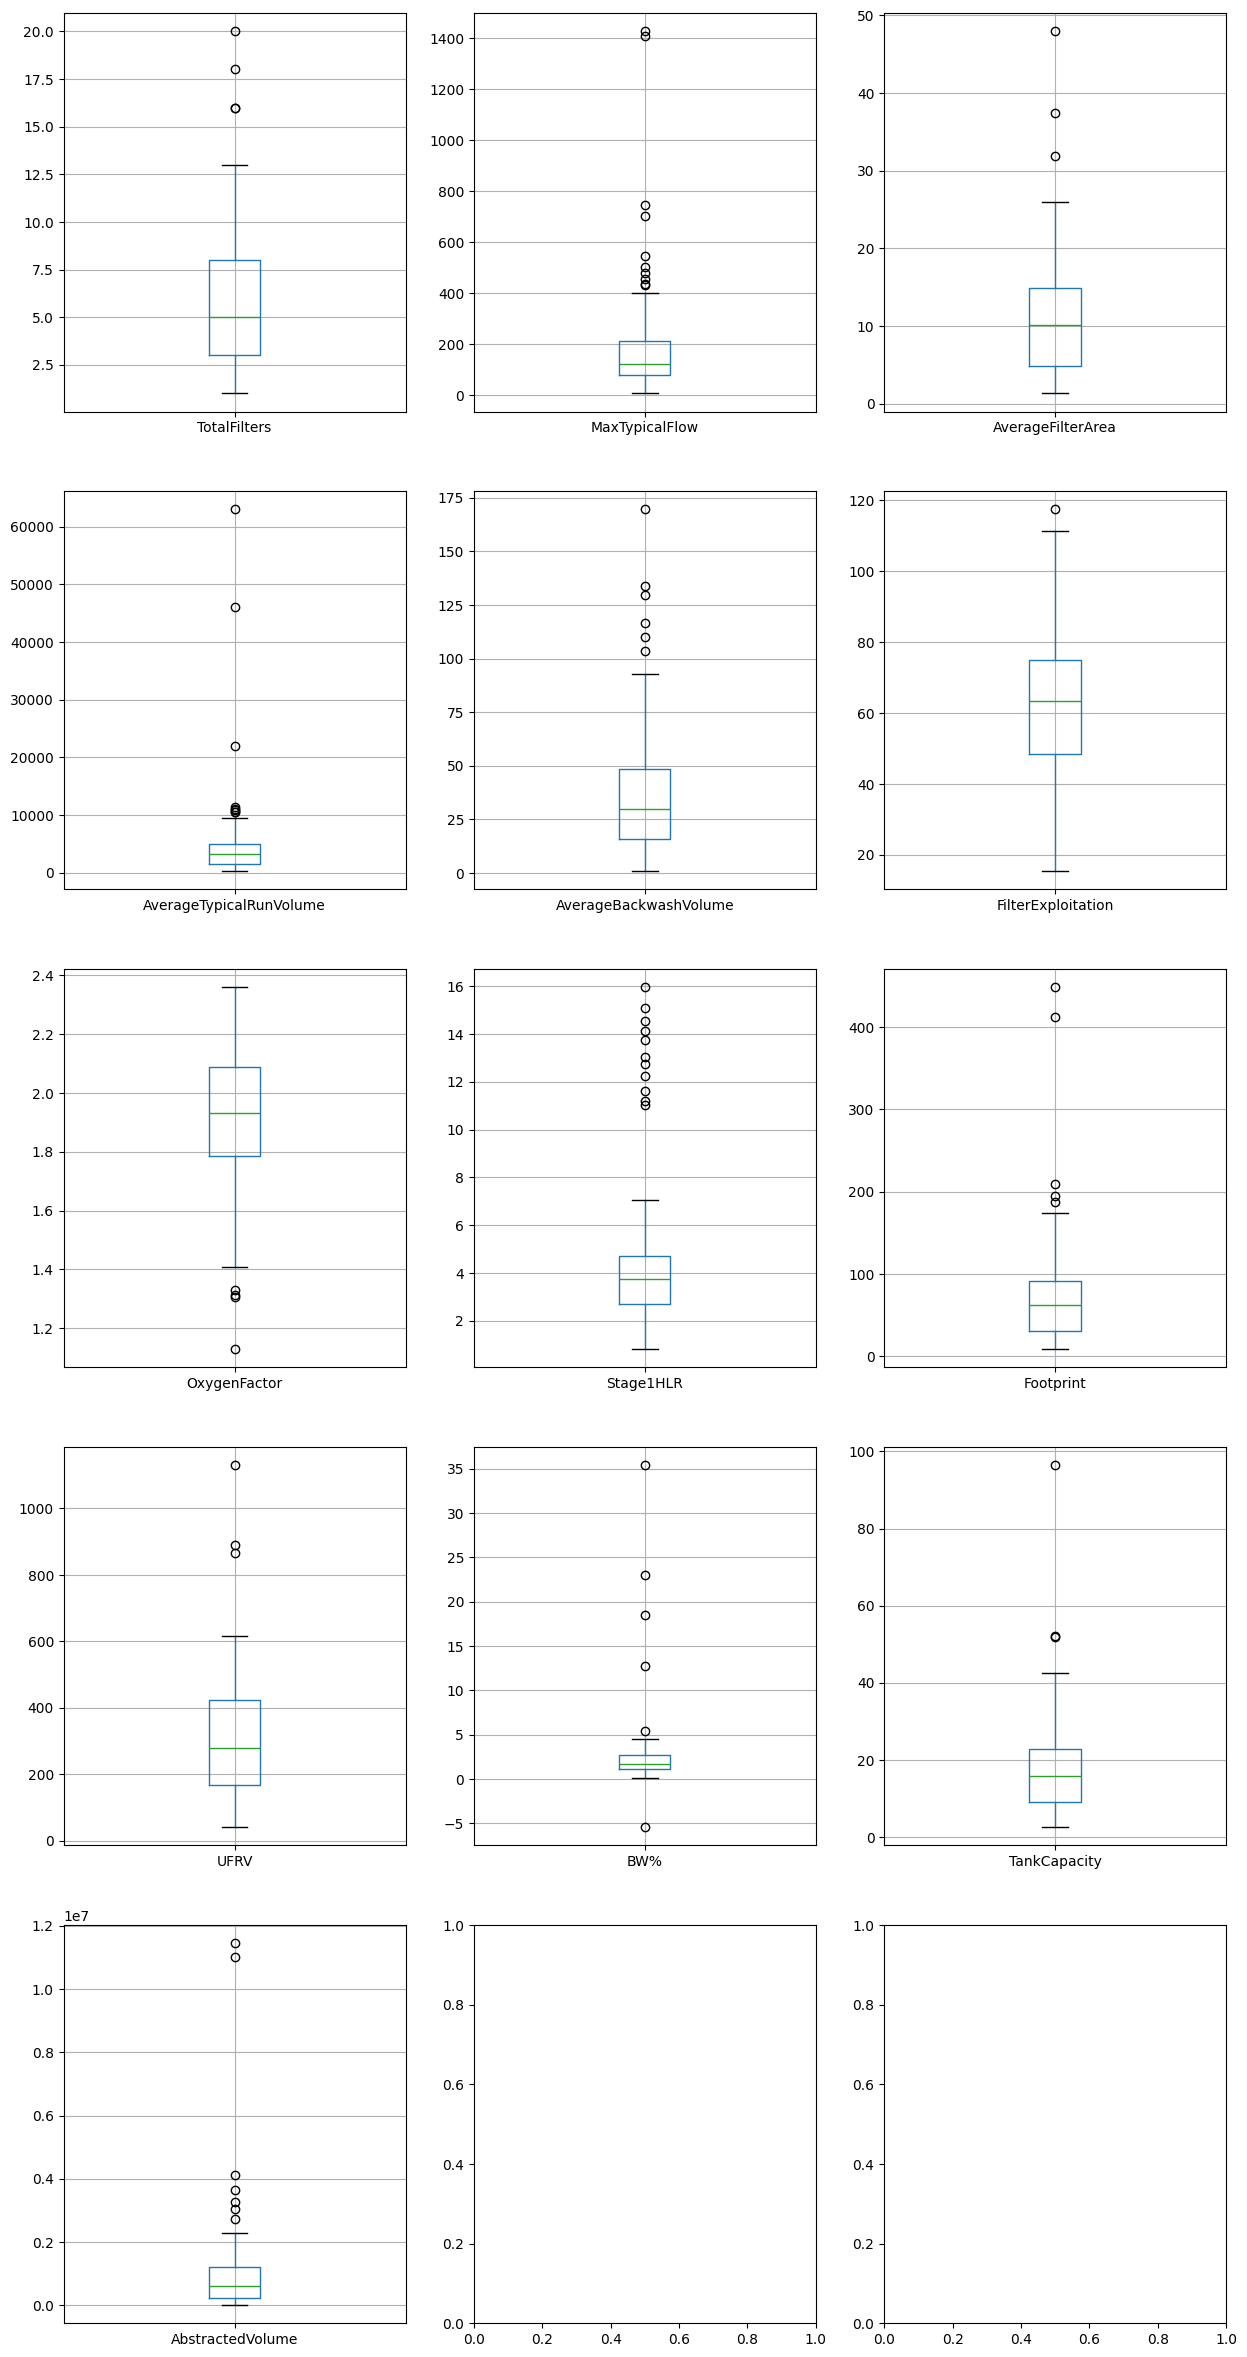

In [11]:
fig, axes = plt.subplots(5, 3, figsize=(15, 30))

for i, data in enumerate(num_cols):
    ax = axes[i//3, i%3]
    df.boxplot(data, ax=ax)
    




 There are outliers in almost all features, but we won't remove because of lack of domain knowledge. They could be handled later on, if necessary.

Now we are going to handle categorical features, most of the will be one-hot encoded. The feature "Stages" will be handled differently, because it is a ordinal feature. It will be encoded using an ordinal encoder, so that the ordering is preserved.

In [12]:
# We are going to one hot encode categorical columns
cols_to_onehot = [col for col in cat_cols if col != 'Stages']

one_hot_encoded = pd.get_dummies(df[cols_to_onehot], drop_first=True, dtype=float)

df = df.drop(cols_to_onehot, axis=1)
df = pd.concat([df,one_hot_encoded], axis=1)


In [13]:
# We are going to use ordinal encoder to encode the Stages column

ordinal_encoder = OrdinalEncoder(categories=[["Single", "Double", "Triple", "Mixed"]])
# Reshaping values to be in column for the encoder to work
values = df['Stages'].values.reshape(-1,1)

df['Stages'] = ordinal_encoder.fit_transform(values)




Now we can scale the numeric features using standard scaler.

In [14]:
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])



Let's dive into correlation between features.

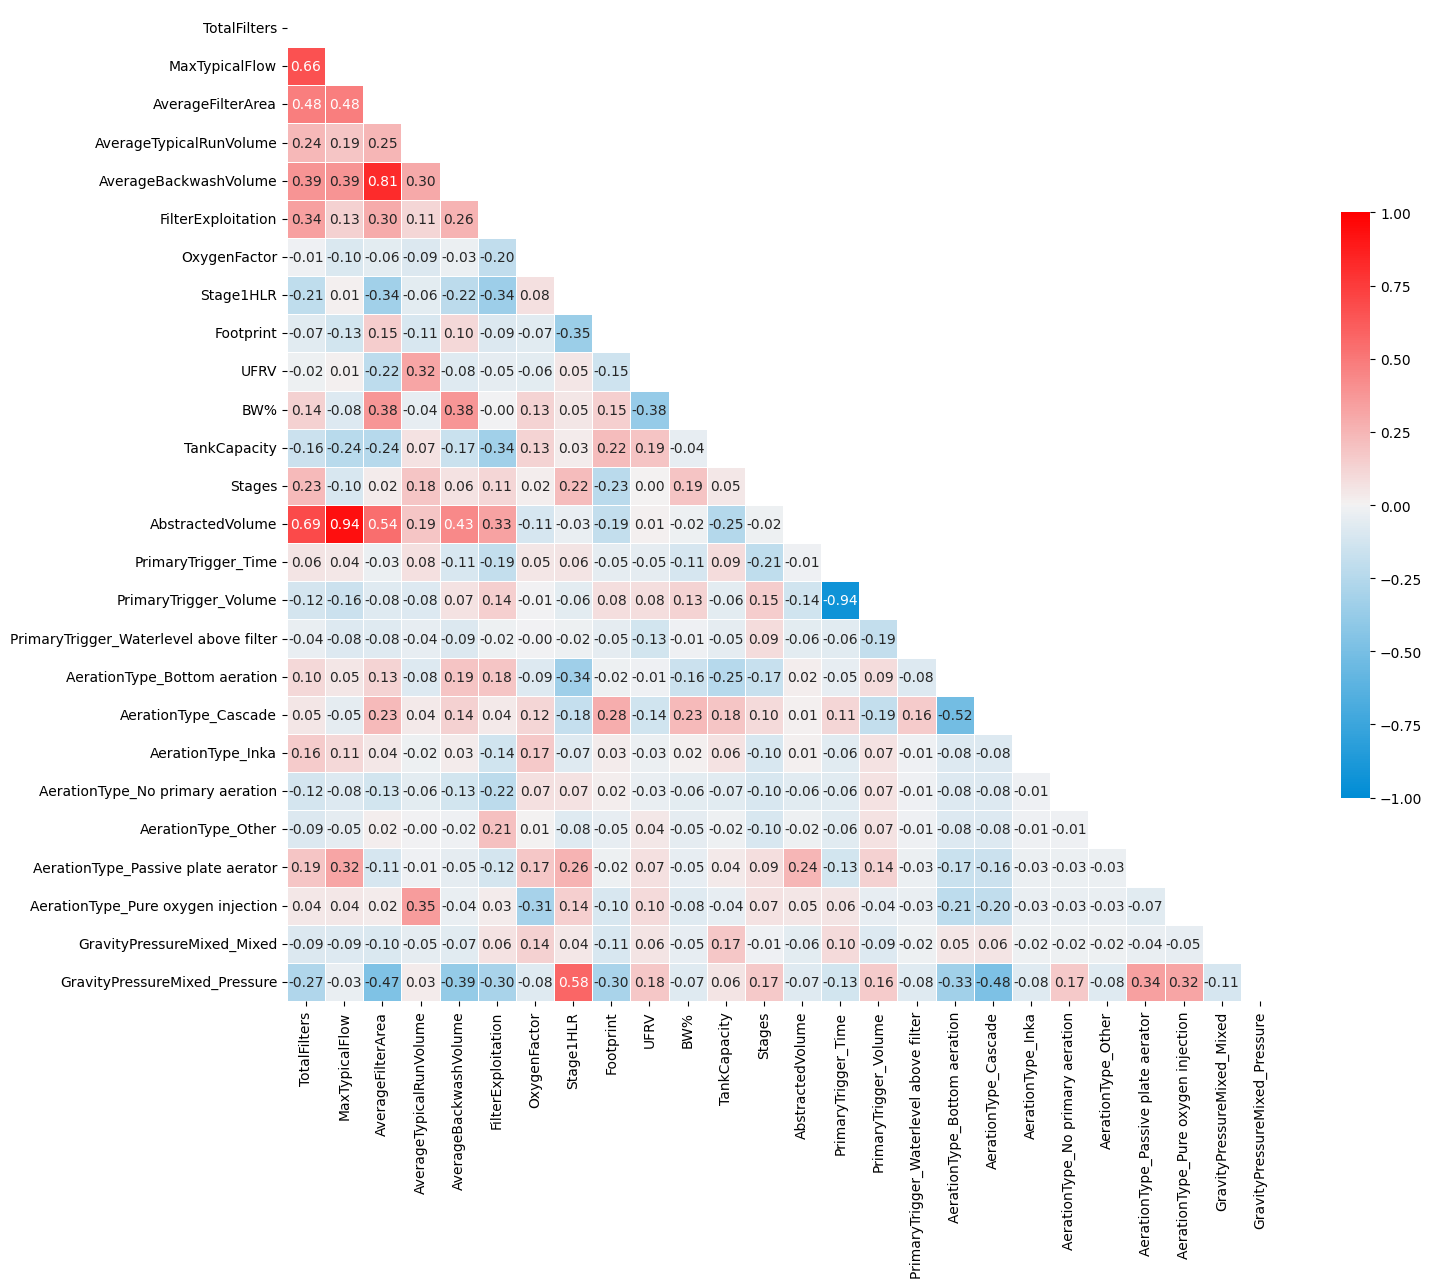

In [15]:
# We will create a heatmap representing the correlation between the features 

corr = df.corr()


figure= plt.figure(figsize=(16, 19))

# Create a mask so that only lower triangle of the heatmap will be visible
# That way we will avoid having redundant information
mask = np.triu(np.ones_like(corr, dtype=bool))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True, s=200)

# draw the heatmap with correct aspect ratio
sns.heatmap(corr,cmap=cmap, mask=mask, vmin=-1, vmax=1, center=0, square=True, linewidths=.7, cbar_kws={"shrink": .4}, annot=True, fmt='.2f')

plt.show()


 Now we can find pairs of features that have correlation coefficient higher than 0.7 and drop one of the features from each pair, because second one is not adding any new information.

In [16]:

# Now we can find pairs of features that have correlation coefficient higher than 0.7 and drop one of the features from each pair, because second one is not adding any new information.

pairs = []

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i != j and abs(corr.iloc[i, j]) > 0.7: 
            if (corr.columns[j], corr.columns[i]) not in pairs:
                pairs.append((corr.columns[i], corr.columns[j]))

print(pairs)

# There are 3 pairs of features that have correlation coefficient higher than 0.7.
# Each pair is here is independent, meaning no feature is in more than one pair.
# We are going to drop one of the features from each pair.

df = df.drop([pair[1] for pair in pairs], axis=1)


[('MaxTypicalFlow', 'AbstractedVolume'), ('AverageFilterArea', 'AverageBackwashVolume'), ('PrimaryTrigger_Time', 'PrimaryTrigger_Volume')]


Now we can look at distribution of numerical features and identify the ones that are skewed.

We are going to try to fix the right-skewness of the features using log transformation.

We are going to consider columns are right-skewed if the their skewness is higher than 1.

Right-skewed columns: ['TotalFilters', 'MaxTypicalFlow', 'AverageFilterArea', 'AverageTypicalRunVolume', 'Stage1HLR', 'Footprint', 'UFRV', 'BW%', 'TankCapacity']


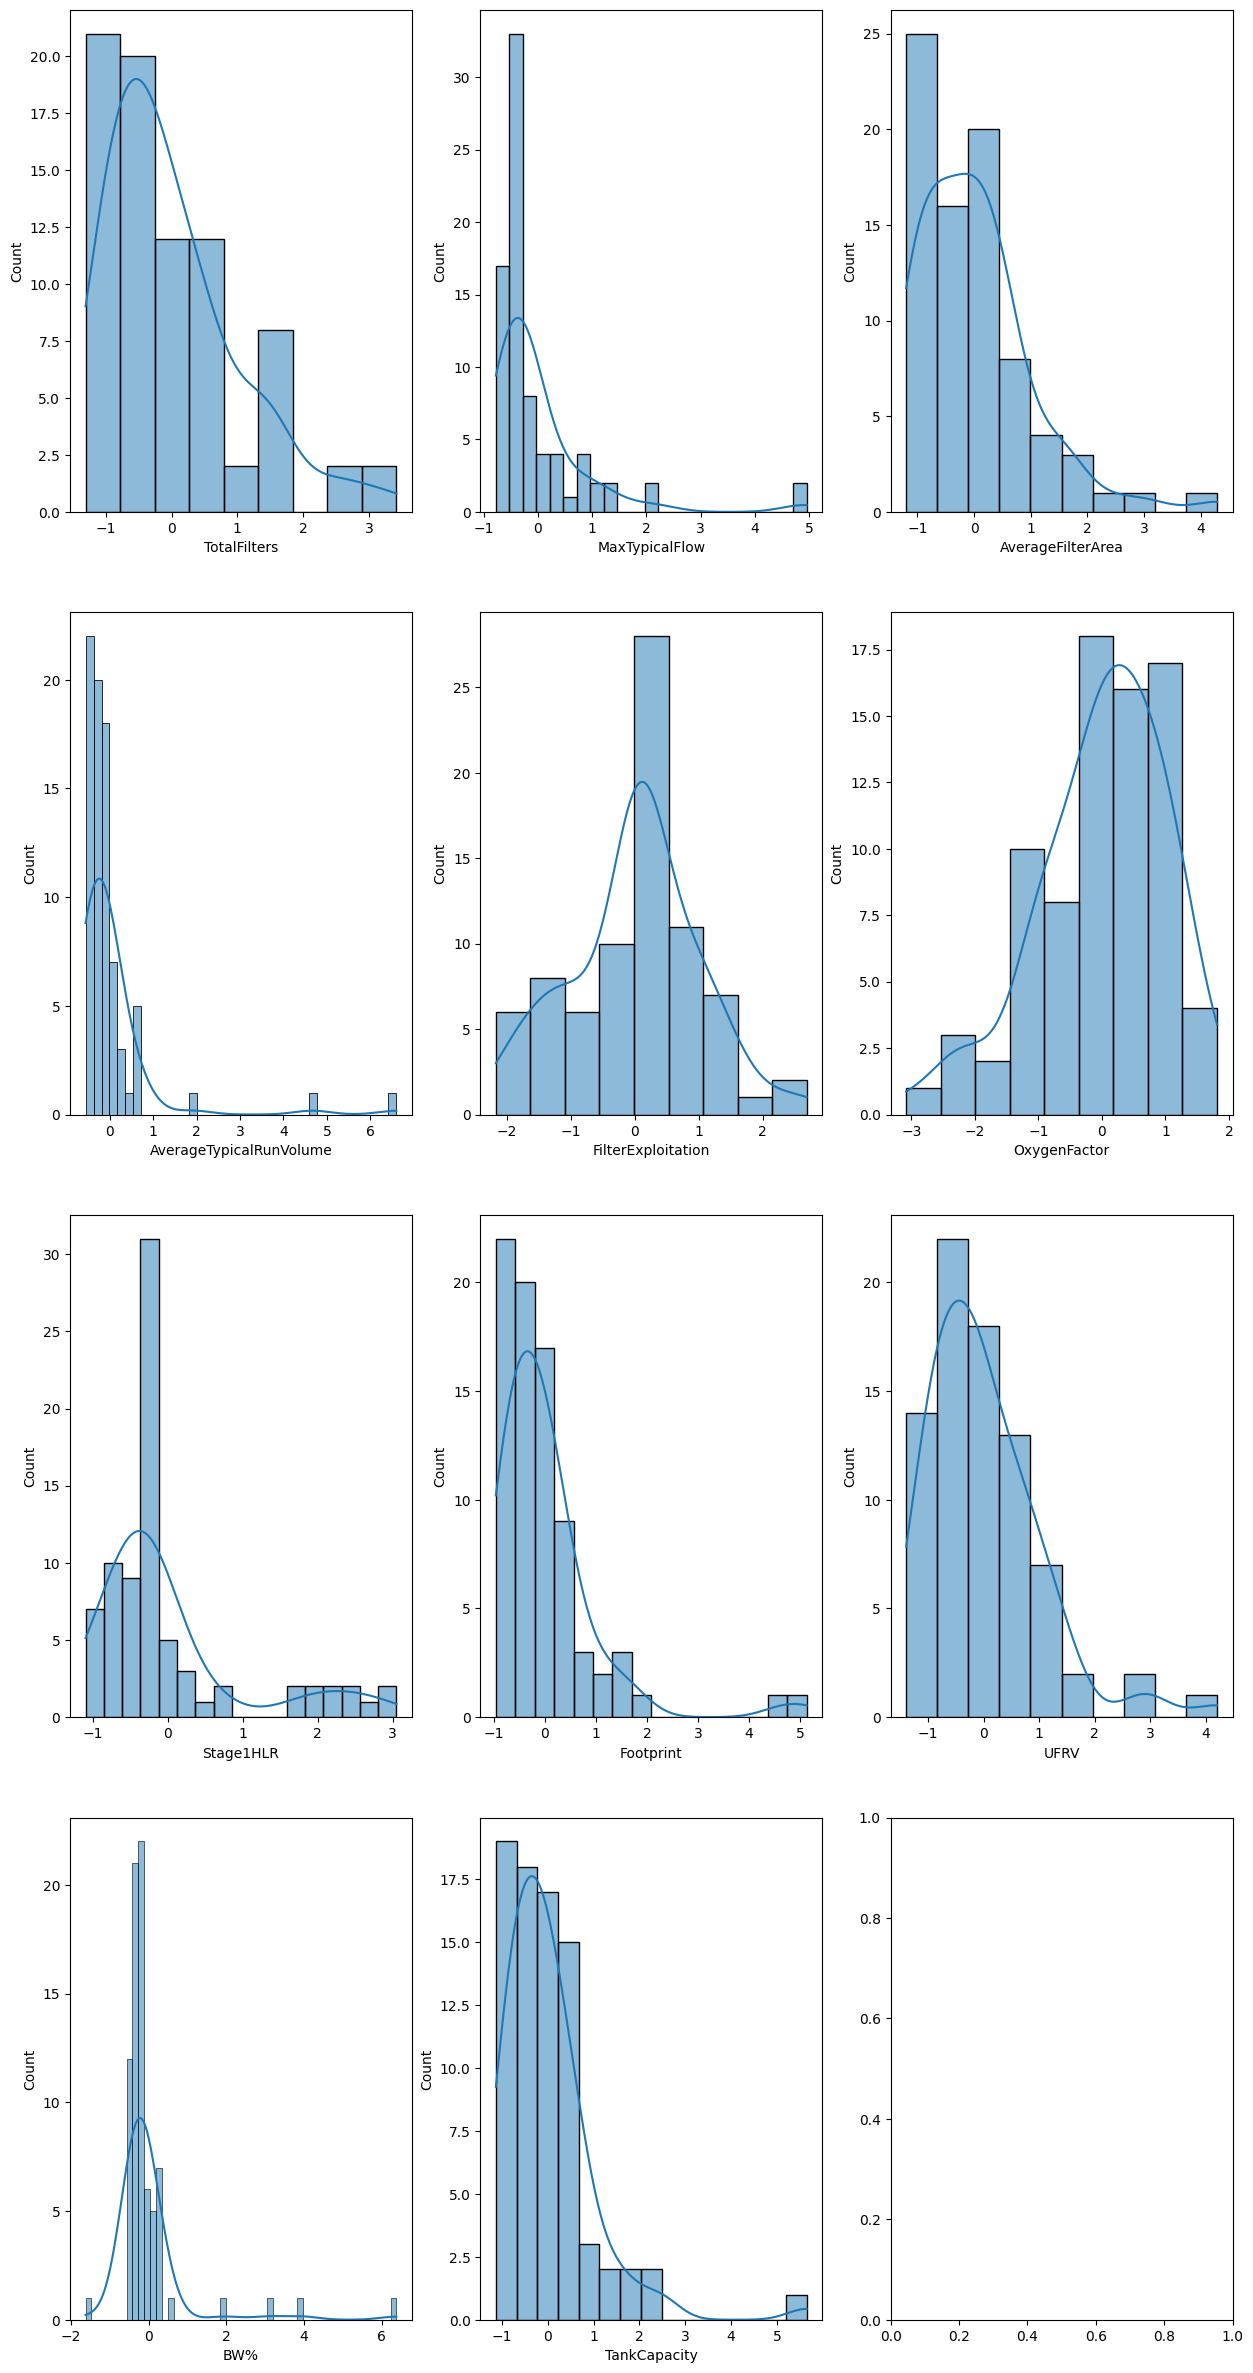

In [17]:
# Let's plot histograms for all numerical columns 

fig, axes = plt.subplots(4, 3, figsize=(15, 30))

num_cols = [col for col in num_cols if col in df.columns]

right_skewed_cols = []

for i, data in enumerate(num_cols):
    ax = axes[i//3, i%3]
    sns.histplot(df[data], kde=True, ax=ax)
    if df[data].skew() > 1: 
        right_skewed_cols.append(data)


print(f"Right-skewed columns: {right_skewed_cols}")
    


In [18]:
# We will recursively apply log transformation to right-skewed columns until they are not right-skewed anymore
def fix_skewness(data):
    data = np.log1p(data)
    if data.skew() > 1:
        return fix_skewness(data)
    return data 

for col in right_skewed_cols:
    df[col] = fix_skewness(df[col]) 

/home/hedrekao/vs-code/ml-course/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


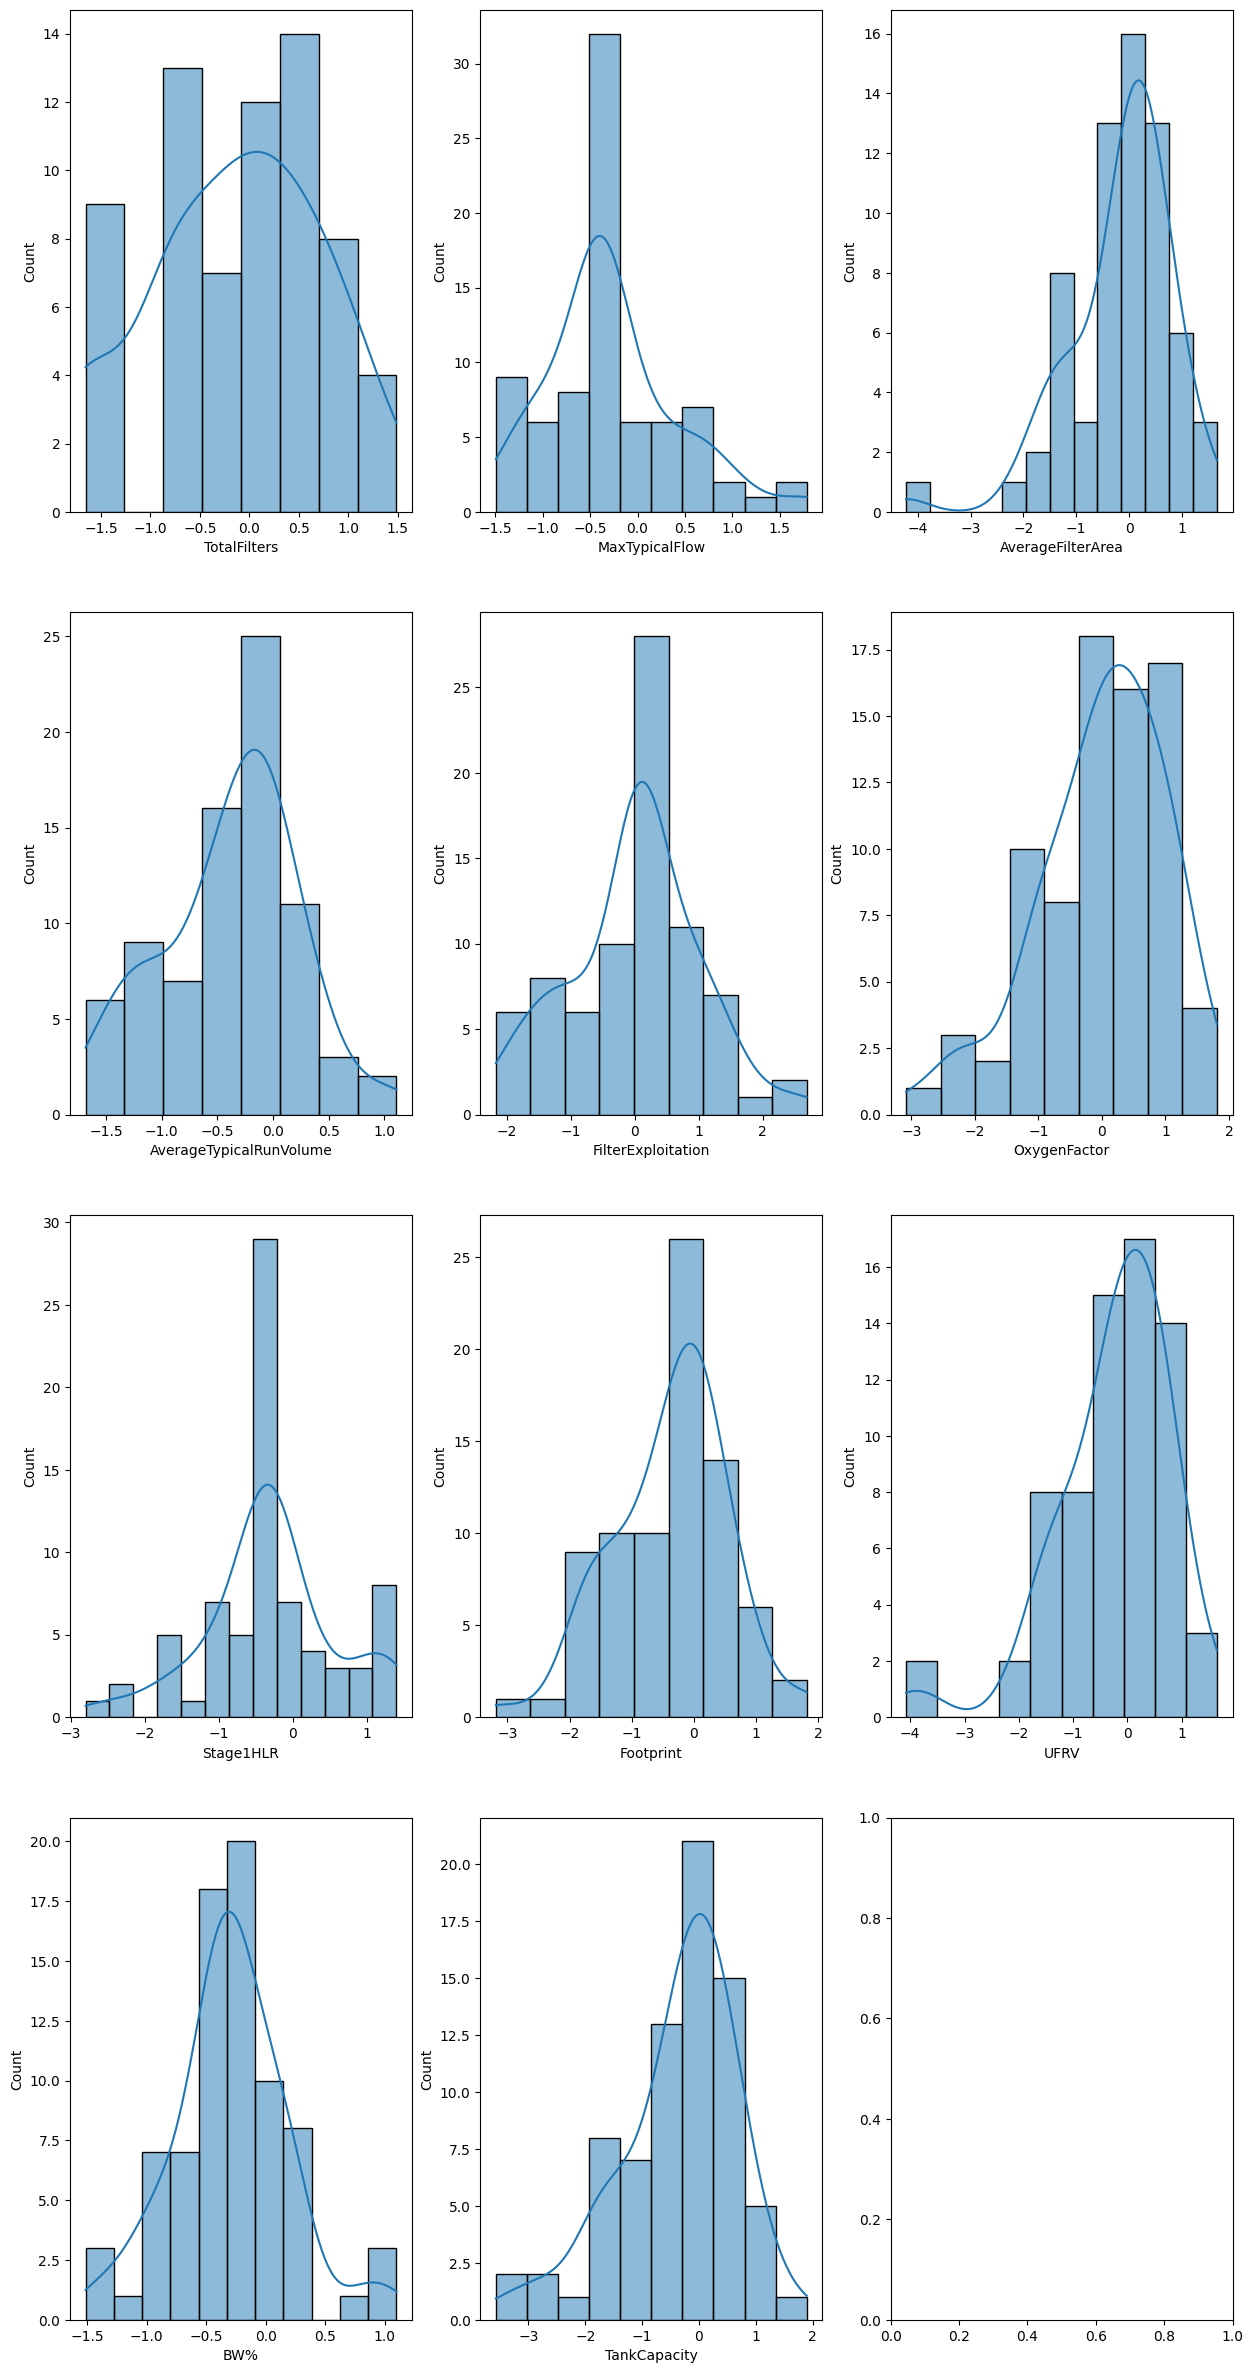

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(15, 30))

num_cols = [col for col in num_cols if col in df.columns]

for i, data in enumerate(num_cols):
    ax = axes[i//3, i%3]
    sns.histplot(df[data], kde=True, ax=ax)


As we can see the distribution of the features is much closer to normal now. There are some features that are slightly left-skewed, so that could have been another area to investigate.

For now, we can consider our data relatively cleaned.

Because the number of observations was small, we were trying to avoid to delete any rows for example when dealing missing values. Also we dropped the threshold for dropping columns with missing values to 30%, because with such small number of rows, imputing can with median or mean can be unreliable.
Imputing with iterative imputer is also not that great then, because the regression model would be built on small number of observations.

Small number of observations is often a problem in machine learning as many models need bigger amount of data to learn key properties of dataset, so we have to think more about choice of the model (e.g, naive bayes can work well with small datasets). Cross validation is also important, because we can't afford to lose too much data for training and testing and validation. 

Another extreme solution would be generating synthetic data, but that might not be reliable.